<a href="https://colab.research.google.com/github/ritwiks9635/NLP_Project_File/blob/main/Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
! unzip /content/https:/www.kaggle.com/datasets/kazanova/sentiment140/sentiment140.zip

Archive:  /content/https:/www.kaggle.com/datasets/kazanova/sentiment140/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "latin", header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
data.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
data.shape

(1600000, 6)

In [7]:
data.isnull().sum()

sentiment    0
id           0
date         0
query        0
user_id      0
text         0
dtype: int64

In [8]:
data.drop(['id', 'date', 'query', 'user_id'], axis=1, inplace=True)

In [9]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
data['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [11]:
data["sentiment"] = data["sentiment"].map({0:0, 4:1})

In [12]:
data['sentiment'].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
stop_word = stopwords.words("english")
stemmer = SnowballStemmer("english")
clean_p = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [15]:
def preprocess_text(text, stem = False):
  text = re.sub(clean_p, ' ', str(text).lower()).strip()
  token = []
  for x in text.split():
    if x not in stop_word:
      if stem:
        token.append(stemmer.stem(x))
      else:
        token.append(x)
  return " ".join(token)

In [16]:
data["text"] = data["text"].apply(lambda x : preprocess_text(x))

In [17]:
data.head()

,sentiment,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving mad see


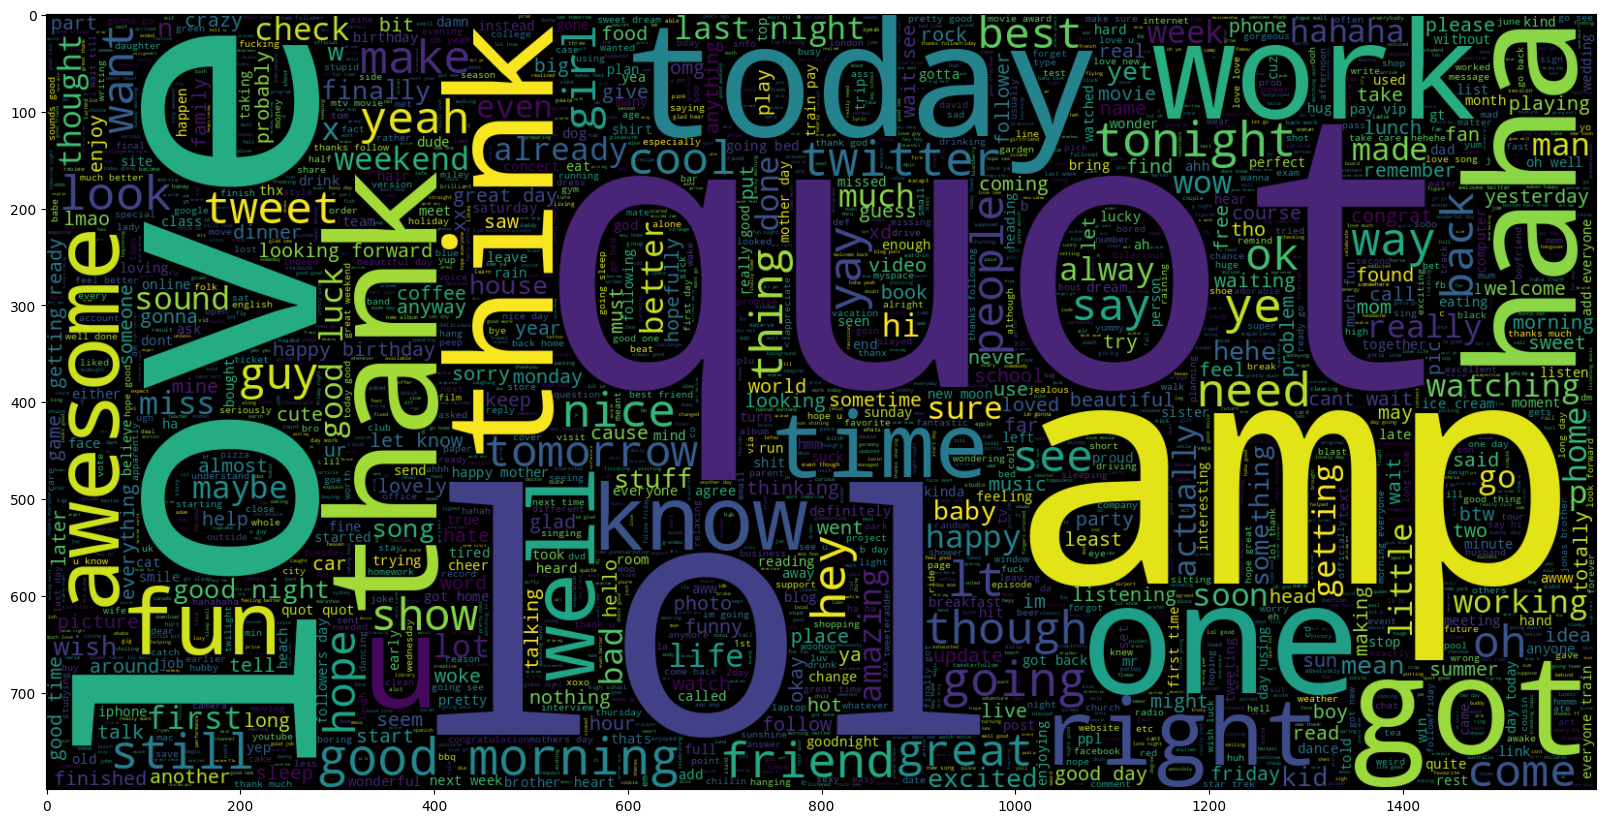

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

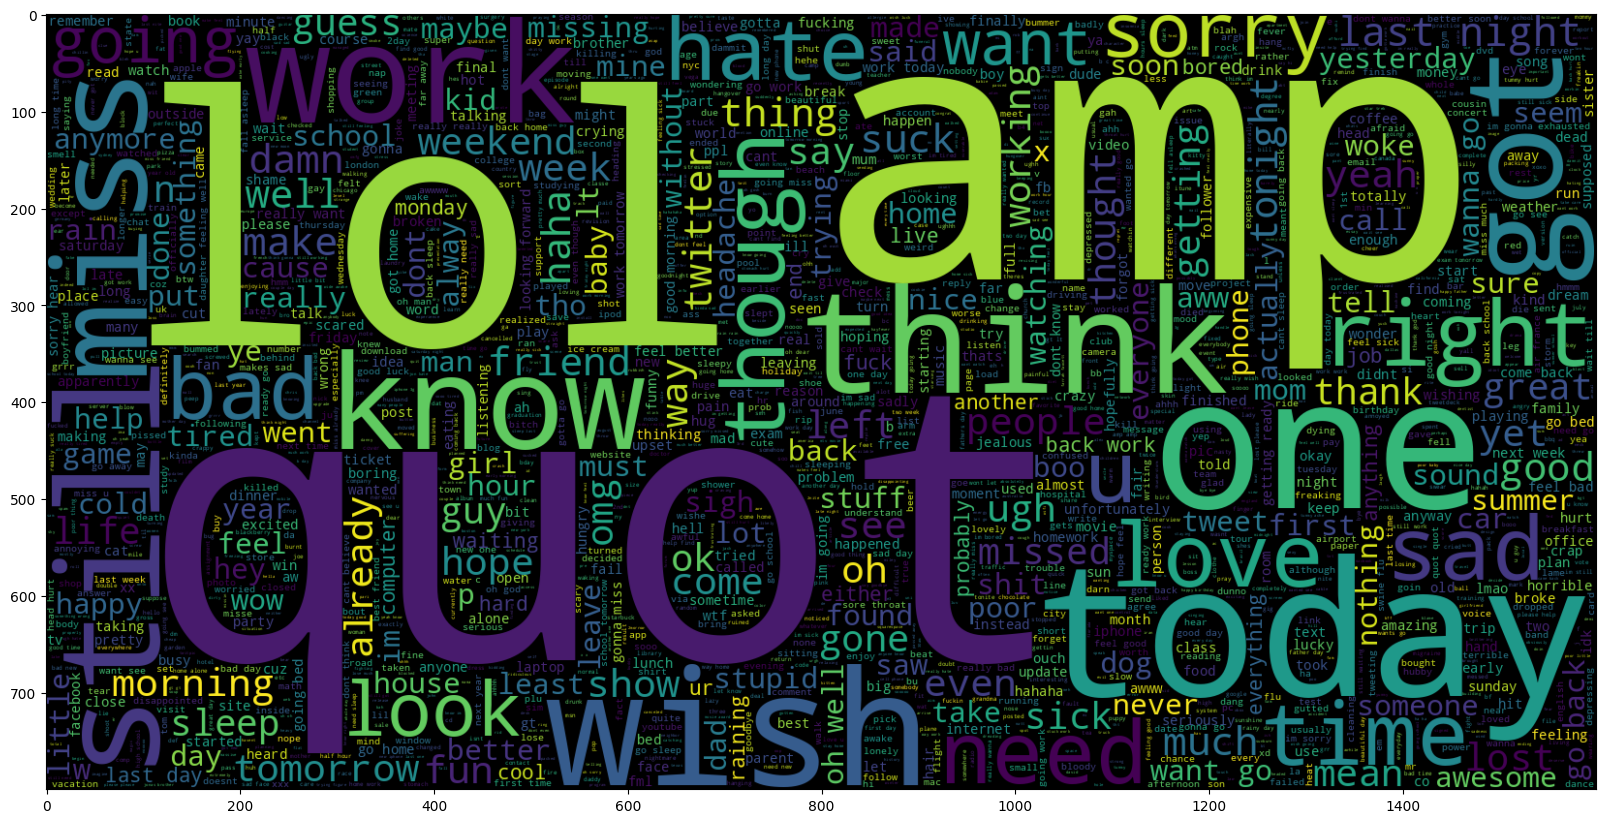

In [19]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [20]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state = 42)
print(f"train_data::{train_data.shape} \n test_data :: {test_data.shape}")

train_data::(1280000, 2) 
 test_data :: (320000, 2)


In [21]:
train_data.head()

,sentiment,text
1374558,1,ya quot like palm pre touchstone charger ready...
1389115,1,felt earthquake afternoon seems epicenter
1137831,1,ruffles shirts like likey
790714,0,pretty bad night crappy morning fml buttface d...
1117911,1,yeah clear view


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
token = Tokenizer()
token.fit_on_texts(train_data["text"])
word_index = token.word_index
vocab_size = len(word_index) + 1
print(f"vocabulary:: {vocab_size}")

vocabulary:: 290419


In [23]:
sequence = token.texts_to_sequences(train_data["text"])
x_train = pad_sequences(sequence, maxlen = 30)

sequence1 = token.texts_to_sequences(test_data["text"])
x_test = pad_sequences(sequence1, maxlen = 30)

In [24]:
x_train.shape, x_test.shape

((1280000, 30), (320000, 30))

In [25]:
labels = train_data.sentiment.unique().tolist()

In [26]:
y_train = train_data.sentiment.values
y_test = test_data.sentiment.values

In [27]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [28]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-08-23 14:49:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-08-23 14:49:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-08-23 14:49:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [31]:
globe_path = "glove.6B.300d.txt"
embedding_dim = 300
learning_rate = 1e-3
batch_size = 1024
EPOCHS = 10

In [32]:
embedding_vector = {}
with open(globe_path) as f:
  for line in f:
    value = line.split()
    word = value[0]
    coefs = np.asarray(value[1:], dtype='float32')
    embedding_vector[word] = coefs
f.close()

print('Found %s word vectors.' %len(embedding_vector))

Found 400000 word vectors.


In [33]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, idx in word_index.items():
  embedding_vec = embedding_vector.get(word)
  if embedding_vec is not None:
    embedding_matrix[idx] = embedding_vec

In [35]:
embedding_matrix.shape

(290419, 300)

In [34]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          embedding_dim,
                                          weights=[embedding_matrix],
                                          input_length=30,
                                          trainable=False)

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (30,), dtype = "int32"),
    embedding_layer,
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Conv1D(64, 5, activation = "relu"),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout = 0.2, recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation  = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
    ])

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [39]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 172s 125ms/step - loss: 0.5189 - accuracy: 0.7396 - val_loss: 0.4810 - val_accuracy: 0.7663 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.4875 - accuracy: 0.7623 - val_loss: 0.4718 - val_accuracy: 0.7730 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 151s 121ms/step - loss: 0.4771 - accuracy: 0.7690 - val_loss: 0.4686 - val_accuracy: 0.7757 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.4704 - accuracy: 0.7734 - val_loss: 0.4657 - val_accuracy: 0.7770 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 152s 122ms/step - loss: 0.4663 - accuracy: 0.7763 - val_loss: 0.4615 - val_accuracy: 0.7794 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 159s 127ms/step - loss: 0.4628 - accuracy: 0.7786 - val_loss: 0.4606 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 7/10
1250/1250 [============

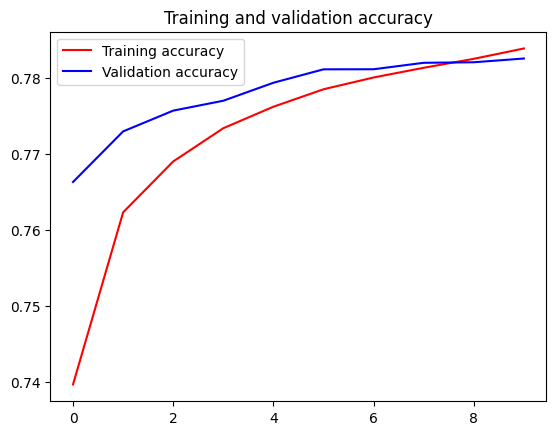

<Figure size 640x480 with 0 Axes>

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()